# Temperature programme calculator and visualiser

## The temprog class

In [27]:
import matplotlib.pyplot as plt
import numpy as np

class tempprog:
    """
    A class that processes temperature programme.
    """
    def __init__(self, name, description):
        self.name = name
        self.description = description
        
    def __str__(self):
        return "Temperature programme {0}:\n This programme has {1} steps, including {2} ramp and {3} dwell steps. \
        \n This programme takes {4:.2f} hours to run.".format(self.name,
                                                              self.steps(print_steps=False),
                                                              self.ramps(print_ramps=False),
                                                              self.dwells(print_dwells=False),
                                                              self.timing(print_t=False))

    def ramps(self, print_ramps=True):
        """
        Calculates the number of ramp steps in a tempprog object
        """
        n_ramps = sum((step[0] == "R" or step[0] == "ramp") for step in self.description)
        if n_ramps == 1:
            if print_ramps:
                print(f'{self.name} has only one ramp step.')
        else:
            if print_ramps:
                print(f'{self.name} has {n_ramps} ramp steps.')
        return n_ramps
        
    def dwells(self, print_dwells=True):
        """
        Calculates the number of dwell steps in a tempprog object
        """
        n_dwells = sum((step[0] == "D" or step[0] == "dwell") for step in self.description)
        if n_dwells == 1:
            if print_dwells:
                print(f'{self.name} has only one dwell step.')
        else:
            if print_dwells:
                print(f'{self.name} has {n_dwells} dwell steps.')
        return n_dwells
    
    def steps(self, print_steps=True):
        """
        Calculates the total steps of a tempprog object
        """
        n_steps = sum((step[0] == "R" or step[0] == "ramp") for step in self.description)
        + sum((step[0] == "D" or step[0] == "dwell") for step in self.description)
        if n_steps == 1:
            if print_steps:
                print(f'{self.name} has only one step.')
        else:
            if print_steps:
                print(f'{self.name} has {n_steps} steps.')
        return n_steps
        
    def timing(self, step_index=None, step_time=False, print_t=True):
        """
        Calculates the time the programme consumes.
        Pass the step index and set step_time to True to calculate how long a specific step will take
        """
        time = 0
        if step_time:
            step = self.description[step_index]
            if step[0] == "R" or step[0] == "ramp":
                time += abs(step[2]-step[1])/(60*step[3])
                if print_t:
                    print("Step {0} of {1} takes {2:.2f} hours to run.".format(step_index+1, self.name, time))
            elif step[0] == "D" or step[0] == "dwell":
                time += step[2]
                if print_t:
                    print("Step {0} of {1} takes {2:.2f} hours to run.".format(step_index+1, self.name, time))
        else:
            for step in self.description:
                if step[0] == "R" or step[0] == "ramp":
                    time += abs(step[2]-step[1])/(60*step[3])
                elif step[0] == "D" or step[0] == "dwell":
                    time += step[2]
            if print_t:
                print("{0} takes {1:.2f} hours to run.".format(self.name, time))
        return time

    def plot(self, savefig=True, dpi=300, **kwargs):
        """
        Function to plot the programme.
        Can pass matplotlib.pyplot kwargs to set plot parameters
        """
        time, temp = [], []
        for i, step in enumerate(self.description):
            if i==0:
                t = self.timing(i,True,False)
                time.append(np.linspace(0, t, int(self.timing(i,True,False)*60)))
            else:
                time.append(np.linspace(t, t + self.timing(i,True,False), int(self.timing(i,True,False)*60)))
                t += self.timing(i,True,False)
            if step[0] == "R" or step[0] == "ramp":
                temp.append(np.linspace(step[1], step[2], int(self.timing(i,True,False)*60)))
            elif step[0] == "D" or step[0] == "dwell":
                temp.append(np.linspace(step[1], step[1], int(self.timing(i,True,False)*60)))
                
        fig, ax = plt.subplots(constrained_layout=True)
        
        for i in range(len(temp)):
            ax.plot(time[i], temp[i], **kwargs)
        
        ax.set_xlabel("time (h)", fontsize=16)
        ax.set_ylabel(r"temperature ($^{\circ}$C)", fontsize=16)
        ax.tick_params(axis='both', labelsize= 14)
        
        if savefig:
            plt.savefig(self.name+".jpg", dpi = dpi)
        else:
            print("To save figure, set savefig=True.")
            
        plt.show()

## Example

Creat a temprog object, and quick check information.

In [28]:
description =(
    ("ramp", 20, 800, 5),
    ("ramp", 800, 1050, 2),
    ("dwell", 1050, 10),
    ("ramp", 1050, 20, 5)
)

AF_AD_LSTO_pre = tempprog("AF_AD_LSTO_pre", description)
# Quick check the info of the temperature programme
print(AF_AD_LSTO_pre)

Temperature programme AF_AD_LSTO_pre:
 This programme has 3 steps, including 3 ramp and 1 dwell steps.         
 This programme takes 18.12 hours to run.


Specify the information of interest.

In [11]:
AF_AD_LSTO_pre.steps()

AF_AD_LSTO_pre has 3 steps.


3

In [12]:
AF_AD_LSTO_pre.dwells()

AF_AD_LSTO_pre has only one dwell step.


1

In [13]:
AF_AD_LSTO_pre.timing()

AF_AD_LSTO_pre takes 18.12 hours to run.


18.116666666666667

In [14]:
AF_AD_LSTO_pre.timing(1,True)

Step 2 of AF_AD_LSTO_pre takes 2.08 hours to run.


2.0833333333333335

## Visualisation of the temperature programme

To save figure, set savefig=True.


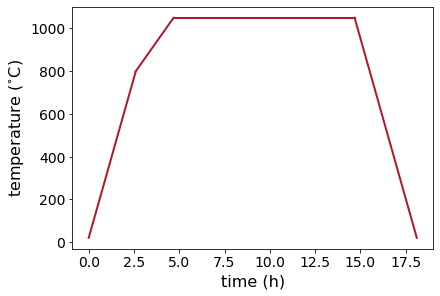

In [22]:
kwargs={
    'linestyle': '-',
    'lw': 2,
    "color": "#b2182b",
       }
AF_AD_LSTO_pre.plot(False, **kwargs)